<a href="https://colab.research.google.com/github/OVP2023/ML/blob/main/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%BE_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?
Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.datasets import fetch_california_housing

In [2]:
#Получите данные и загрузите их в рабочую среду
housing = fetch_california_housing()

In [3]:
#Исходные признаки
X=pd.DataFrame(housing.data)
X.rename(columns={0:'MedInc_средний_доход',1:'HouseAge_средний_возраст_дома ',2:'AveRooms_среднее_количество_комнат',3:'AveBedrms_среднее_количество_спален' ,4:'Population_население',5:'AveOccup_среднее_количество_жильцов',6:'Latitude_широта',7:'Longitude_долгота'}, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MedInc_средний_доход                 20640 non-null  float64
 1   HouseAge_средний_возраст_дома        20640 non-null  float64
 2   AveRooms_среднее_количество_комнат   20640 non-null  float64
 3   AveBedrms_среднее_количество_спален  20640 non-null  float64
 4   Population_население                 20640 non-null  float64
 5   AveOccup_среднее_количество_жильцов  20640 non-null  float64
 6   Latitude_широта                      20640 non-null  float64
 7   Longitude_долгота                    20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [4]:
#целевая переменная - медианная стоимость дома, в сотнях тыс. дол.
y=pd.DataFrame(housing.target)
y.rename(columns={0:'Price,K$'},inplace=True)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price,K$  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [ ]:
#Проведите первичный анализ. a.Проверьте данные на пропуски. Удалите в случае обнаружения. b.*Нормализуйте один из признаков.

In [5]:
#Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
#Обучите модель регрессии на обучающем множестве. Для тестового множества предскажите целевую переменную и сравните с истинным значением,
#посчитав точность предсказания модели. Для этого используйте встроенную функцию score.


model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)
print(round(model.score(X_test,y_test),3))



0.594


In [15]:
#Модель дерево решений регрессия
from sklearn.tree import DecisionTreeRegressor

#Оптимизируйте глубину дерева (max_depth) большая метрика получилась при max_depth=14
for i in range(1,20):
    clf = DecisionTreeRegressor(min_samples_leaf=10, max_depth=i, random_state=10)
    clf.fit(X_train, y_train)

    print('max_depth=',i,'->',round(clf.score(X_test,y_test),3))
#Оптимизируем min_samples_leaf, min_samples_leaf=11
for i in range(1,20):
    clf = DecisionTreeRegressor(min_samples_leaf=i, max_depth=14, random_state=10)
    clf.fit(X_train, y_train)

    print('min_samples_leaf=',i,'->',round(clf.score(X_test,y_test),3))

#С оптимизированными параметрами получается такой scor
clf = DecisionTreeRegressor(min_samples_leaf=11, max_depth=14, random_state=10)
clf.fit(X_train, y_train)

print('Accuracy->',round(clf.score(X_test,y_test),3))




max_depth= 1 -> 0.284
max_depth= 2 -> 0.418
max_depth= 3 -> 0.499
max_depth= 4 -> 0.542
max_depth= 5 -> 0.586
max_depth= 6 -> 0.622
max_depth= 7 -> 0.654
max_depth= 8 -> 0.671
max_depth= 9 -> 0.696
max_depth= 10 -> 0.701
max_depth= 11 -> 0.711
max_depth= 12 -> 0.717
max_depth= 13 -> 0.719
max_depth= 14 -> 0.721
max_depth= 15 -> 0.72
max_depth= 16 -> 0.719
max_depth= 17 -> 0.719
max_depth= 18 -> 0.72
max_depth= 19 -> 0.72
min_samples_leaf= 1 -> 0.62
min_samples_leaf= 2 -> 0.644
min_samples_leaf= 3 -> 0.665
min_samples_leaf= 4 -> 0.684
min_samples_leaf= 5 -> 0.694
min_samples_leaf= 6 -> 0.698
min_samples_leaf= 7 -> 0.708
min_samples_leaf= 8 -> 0.719
min_samples_leaf= 9 -> 0.72
min_samples_leaf= 10 -> 0.721
min_samples_leaf= 11 -> 0.724
min_samples_leaf= 12 -> 0.723
min_samples_leaf= 13 -> 0.718
min_samples_leaf= 14 -> 0.721
min_samples_leaf= 15 -> 0.721
min_samples_leaf= 16 -> 0.717
min_samples_leaf= 17 -> 0.718
min_samples_leaf= 18 -> 0.717
min_samples_leaf= 19 -> 0.716
Accuracy-> 0.724

In [ ]:
#Вывод: модель Деревья более точная чем линейная регрессия для этой задачи: Accuracy 0.724  против 0.594

In [17]:
from sklearn.tree import plot_tree

# Fit regression model
list_depth = [1,2,3,4,5,7]

dt_regs = {}
for i in list_depth:
    dt_regs[f'depth={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X, y)

dt_regs['depth=inf'] = DecisionTreeRegressor(random_state=10).fit(X, y)
dt_regs['reg'] = DecisionTreeRegressor(min_samples_leaf=3, random_state=10).fit(X, y)

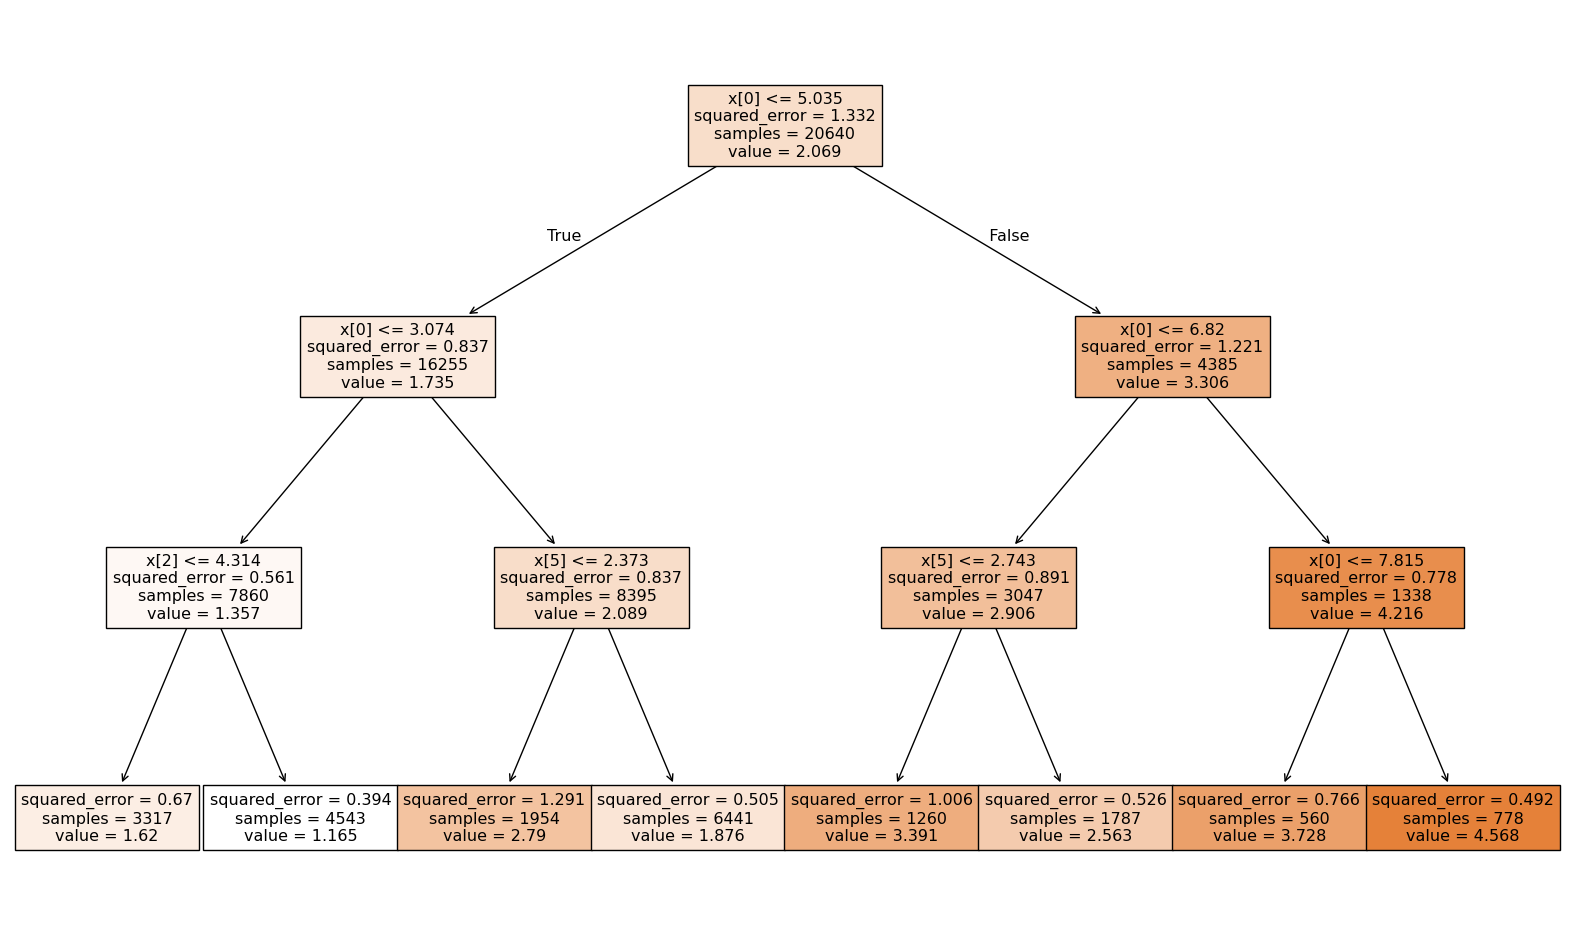

In [18]:
plt.figure(figsize=(20, 12))
plot_tree(dt_regs['depth=3'], filled=True);